In [27]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 1 导包+导入数据集

In [3]:
# 上海地铁站点连接表
df = pd.read_csv('shanghai_subway.csv')
df.head()

,前一站,后一站,地铁线,时间（分钟）
0,莘庄,外环路,1,2
1,外环路,莲花路,1,2
2,莲花路,锦江乐园,1,3
3,锦江乐园,上海南站,1,3
4,上海南站,漕宝路,1,3


## 2 创建多路图，导入节点和边信息

In [4]:
# 创建多路图
G = nx.MultiGraph()

In [5]:
for idx, row in df.iterrows(): # 遍历表格的每一行，添加节点
    G.add_edges_from([(row['前一站'], row['后一站'])], line=row['地铁线'], time=row['时间（分钟）'])

In [19]:
print(f'节点个数：{len(G)}，连接个数：{len(G.edges)}')

# 查看连接属性特征
print(G.edges(data=True))

# 查看连接属性特征(multigraph)
# 最后一个维度为边的index，可能为 0，1，2...
print(G.edges[('同济大学', '四平路', 0)])

# 查看两个节点之间的边
print(G['上海火车站']['中潭路'])

节点个数：402，连接个数：492
[('莘庄', '外环路', {'line': 1, 'time': 2}), ('莘庄', '春申路', {'line': 5, 'time': 2}), ('外环路', '莲花路', {'line': 1, 'time': 2}), ('莲花路', '锦江乐园', {'line': 1, 'time': 3}), ('锦江乐园', '上海南站', {'line': 1, 'time': 3}), ('上海南站', '漕宝路', {'line': 1, 'time': 3}), ('上海南站', '石龙路', {'line': 3, 'time': 2}), ('上海南站', '华东理工大学', {'line': 15, 'time': 2}), ('上海南站', '桂林公园', {'line': 15, 'time': 3}), ('漕宝路', '上海体育馆', {'line': 1, 'time': 3}), ('漕宝路', '桂林公园', {'line': 12, 'time': 2}), ('漕宝路', '龙漕路', {'line': 12, 'time': 3}), ('上海体育馆', '徐家汇', {'line': 1, 'time': 2}), ('上海体育馆', '上海体育场', {'line': 4, 'time': 2}), ('上海体育馆', '宜山路', {'line': 4, 'time': 2}), ('徐家汇', '衡山路', {'line': 1, 'time': 2}), ('徐家汇', '宜山路', {'line': 9, 'time': 3}), ('徐家汇', '肇嘉浜路', {'line': 9, 'time': 2}), ('徐家汇', '交通大学', {'line': 11, 'time': 2}), ('徐家汇', '上海游泳馆', {'line': 11, 'time': 3}), ('衡山路', '常熟路', {'line': 1, 'time': 2}), ('常熟路', '陕西南路', {'line': 1, 'time': 2}), ('常熟路', '静安寺', {'line': 7, 'time': 2}), ('常熟路', '肇嘉浜路', {'line': 7, 't

In [48]:
# 查看两个节点之间的边
print(G['上海火车站']['宝山路'])

{0: {'line': 3, 'time': 3}, 1: {'line': 4, 'time': 4}}


## 3 绘制线路图

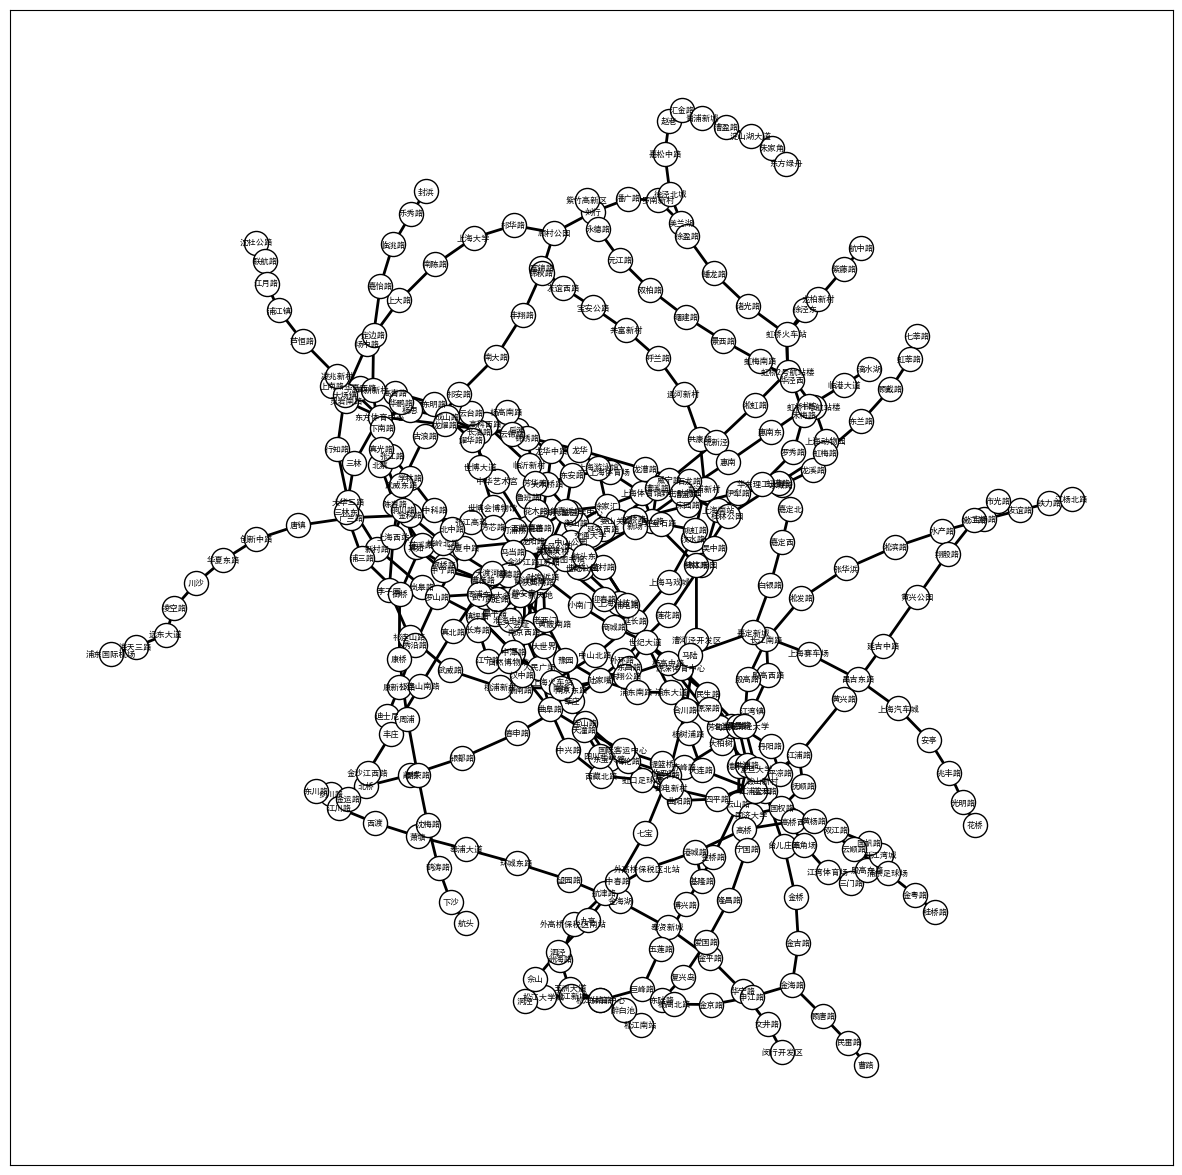

In [30]:
# 节点排版布局-默认弹簧布局
pos = nx.spring_layout(G, seed=123)

# 设置其它可视化样式
options = {
    "font_size": 6,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1, # 节点线宽
    "width": 2, # edge线宽
}
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos, **options)

## 4 计算最短路径

In [45]:
# 任意两节点之间是否存在路径
print(nx.has_path(G, source='昌吉东路', target='同济大学'))

# 任意两节点之间的最短路径
print(nx.shortest_path(G, source='昌吉东路', target='同济大学', weight='time'))

# 任意两节点之间的最短路径长度
print(nx.shortest_path_length(G, source='昌吉东路', target='同济大学', weight='time'))

True
['昌吉东路', '上海赛车场', '嘉定新城', '马陆', '陈翔公路', '南翔', '桃浦新村', '武威路', '祁连山路', '李子园', '上海西站', '真如', '枫桥路', '曹杨路', '镇坪路', '中潭路', '上海火车站', '宝山路', '海伦路', '邮电新村', '四平路', '同济大学']
58


In [34]:
# 全图平均最短路径
# nx.average_shortest_path_length(G, weight='time')

40.945819530775054

In [35]:
# # 某一站去其他站的最短路径
# nx.single_source_shortest_path(G, source='同济大学')

In [36]:
# 某一站去其他站的最短路径长度
# nx.single_source_shortest_path_length(G, source='同济大学')

In [46]:
# 指定起始站和终点站
A_station = '昌吉东路'
B_station = '同济大学'

# 计算最短路径的节点序列
shortest_path = nx.shortest_path(G, source=A_station, target=B_station, weight='time')

# 计算最短路径长度
shortest_path_length = nx.shortest_path_length(G, source=A_station, target=B_station, weight='time')

# 找出最短路径经过的边
edges_in_path = []
for i in range(len(shortest_path) - 1):
    u = shortest_path[i]
    v = shortest_path[i + 1]
    # 找到具有最小权重的边
    min_weight = float('inf')
    min_edge = None
    for key, data in G[u][v].items():
        if data['time'] < min_weight:
            min_weight = data['time']
            line_id = data['line'] # 地铁线编号
            min_edge = (u, v, line_id, data['time'])
    edges_in_path.append(min_edge)

print(f"Shortest path from {A_station} to {B_station}: {shortest_path}")
print(f"Shortest path length from {A_station} to {B_station}: {shortest_path_length}")

Shortest path from 昌吉东路 to 同济大学: ['昌吉东路', '上海赛车场', '嘉定新城', '马陆', '陈翔公路', '南翔', '桃浦新村', '武威路', '祁连山路', '李子园', '上海西站', '真如', '枫桥路', '曹杨路', '镇坪路', '中潭路', '上海火车站', '宝山路', '海伦路', '邮电新村', '四平路', '同济大学']
Shortest path length from 昌吉东路 to 同济大学: 58


In [47]:
print('Edges in the shortest path: ')
for i in edges_in_path:
    print(f"{i[0]}--->{i[1]} {i[2]}号线 {i[3]}分钟")

Edges in the shortest path: 
昌吉东路--->上海赛车场 11号线 4分钟
上海赛车场--->嘉定新城 11号线 4分钟
嘉定新城--->马陆 11号线 3分钟
马陆--->陈翔公路 11号线 4分钟
陈翔公路--->南翔 11号线 3分钟
南翔--->桃浦新村 11号线 3分钟
桃浦新村--->武威路 11号线 3分钟
武威路--->祁连山路 11号线 2分钟
祁连山路--->李子园 11号线 3分钟
李子园--->上海西站 11号线 2分钟
上海西站--->真如 11号线 3分钟
真如--->枫桥路 11号线 2分钟
枫桥路--->曹杨路 11号线 2分钟
曹杨路--->镇坪路 3号线 3分钟
镇坪路--->中潭路 3号线 2分钟
中潭路--->上海火车站 3号线 3分钟
上海火车站--->宝山路 3号线 3分钟
宝山路--->海伦路 4号线 3分钟
海伦路--->邮电新村 10号线 2分钟
邮电新村--->四平路 10号线 2分钟
四平路--->同济大学 10号线 2分钟
